In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !ls
# !mv /content/ldcc-20140209.tar.gz /content/drive/MyDrive/LSA

In [3]:
# # データセットのダウンロード
# !wget https://www.rondhuit.com/download/ldcc-20140209.tar.gz

In [4]:
# # ダウンロードしたtar.gzファイルを解凍
# with tarfile.open('/content/drive/MyDrive/LSA/ldcc-20140209.tar.gz', 'r:gz') as tar:
#     tar.extractall()

In [5]:
# !ls
# !mv /content/text /content/drive/MyDrive/LSA

In [6]:
# 必要なライブラリのインストール
!pip install janome
!pip install japanize-matplotlib

In [7]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import os
import urllib.request
import tarfile
import glob
import re
from janome.tokenizer import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [8]:
# Janomeのトークナイザを初期化
tokenizer = Tokenizer()

# 記事、ファイル名、ラベル名（ディレクトリ名）を保存するリスト
documents = []
document_names = []
labels = []

# データセットのディレクトリ
data_dir = '/content/drive/MyDrive/LSA/text'
ignore_dirs = ['CHANGES.txt','LICENSE.txt', 'README.txt']
categories = [name for name in os.listdir(data_dir) if name not in ignore_dirs]

for category in categories:
  files = glob.glob(os.path.join(data_dir,
                                  category,
                                  '*.txt')) # パターンマッチングでカテゴリごとに.txt名のリストを取得

  files = files[0:100] # 各カテゴリから100ファイルを分析対象とする
  print(category)
  # print(files)

  for file in files:
    # print(file)
    with open(file, 'r', encoding='utf-8') as f:
      lines = f.readlines()[2:] # 各テキストファイルの3行目から取得
      text = ''.join(lines) #

      text = ''.join(lines)
      text = re.sub(r'\n', '', text)  # 改行の除去
      text = re.sub(r'［.*?］', '', text)  # []で囲まれている文章は注釈や補足の傾向があり、トピック分析における重要性は低いと考えられるので消す
      text = re.sub(r'《.*?》', '', text)  # 《》で囲まれている文章は注釈や補足の傾向があり、トピック分析における重要性は低いと考えられるので消す
      text = re.sub(r'[\d!-/:-@[-`{-~]', '', text)  # 半角記号・数字の除去
      text = re.sub(r'[！”＃＄％＆’（）＊＋，－．／：；＜＝＞？＠［＼］＾＿｀｛｜｝～]', '', text)  # 全角記号の除去


      tokens = tokenizer.tokenize(text, wakati=True) # 形態素解析と単語のリスト化
      # tokens = [token for token in tokens if token not in stopwords] # ストップワードの除去（必要に応じて）
      documents.append(' '.join(tokens)) # トークンをスペースで結合して一つの文字列に（＝単語の辞書を作成）
      document_names.append(os.path.basename(file))
      labels.append(category)  # ディレクトリ名をラベルとして追加

livedoor-homme
kaden-channel
smax
topic-news
peachy
it-life-hack
sports-watch
dokujo-tsushin
movie-enter


In [9]:
# BoWによるベクトル化
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(documents)

print(X_bow.toarray().shape) # 形状を表示
print(X_bow.toarray()) # 配列で表示

(900, 26420)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
# TF-IDFによるベクトル化
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(documents)

print(X_tfidf.toarray().shape) # 形状を表示
print(X_tfidf.toarray()) # 配列で表示

(900, 26420)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
# 単語のリストを取得
terms = vectorizer_tfidf.get_feature_names_out()

print(terms[:100])
print(terms[-100:])

['aa' 'aaa' 'aac' 'abagcgwc' 'abc' 'abcd' 'abgn' 'ac' 'acc' 'accessport'
 'accs' 'acl' 'acro' 'acrobat' 'act' 'actually' 'adam' 'adobe' 'adp'
 'adrian' 'adsl' 'advanced' 'adventures' 'ae' 'aesthetic' 'af' 'afc'
 'afpbb' 'afraid' 'african' 'after' 'agac' 'age' 'aha' 'ai' 'aid' 'aij'
 'aiko' 'air' 'aja' 'akb' 'akbaby' 'akbingo' 'akbzx' 'akiba' 'akikolawson'
 'akira' 'alert' 'alices' 'alive' 'all' 'alli' 'allimb' 'always' 'am'
 'amazlet' 'amazon' 'amazoncojp' 'amazoncom' 'amd' 'amf' 'amoled' 'an'
 'analytics' 'anastase' 'and' 'andriod' 'android' 'androidios' 'androidtm'
 'androidtrade' 'angry' 'angrybirds' 'anima' 'animals' 'ann' 'announcing'
 'another' 'answer' 'answeropen' 'anteprima' 'anymode' 'aotsuka' 'aoyama'
 'ap' 'apa' 'apfn' 'apk' 'apli' 'app' 'appcoming' 'appgenix' 'apple'
 'appmax' 'apps' 'apq' 'apqghz' 'apu' 'apuweiserriche' 'aqua']
['ｄｖｄ' 'ｅｍａｉｌ' 'ｅｏｓ' 'ｅｏｓｄ' 'ｅｐ' 'ｆａ' 'ｆａｃｅｂｏｏｋ' 'ｆｌｅａｄｔａｂ' 'ｆｓｍ' 'ｆｔｔｈ'
 'ｇｂ' 'ｇｈz' 'ｇｈｖ' 'ｇｏｌｆ' 'ｇｒ' 'ｇｒｅｅ' 'ｇｒｏｕｎｄ' 'ｇｔ' 'ｈｏｍｅｓｔａｒ' 'ｉｃｆ' 'ｉｏｓ'

In [12]:
# 次元数を設定：次元削減なので、BoWベクトルの次元数（コーパスの単語数）より小さくしないといけない
n_components = 100
n_dim = X_tfidf.toarray().shape[0]
if n_components >= n_dim:
  raise ValueError("n_components must be less than the number of documents.")

# LSA（特異値分解）を適用
svd_model = TruncatedSVD(n_components=n_components, random_state=42)
X_lsa = svd_model.fit_transform(X_tfidf)
print(svd_model.singular_values_)

[5.58941861 3.36197346 2.70643813 2.55097927 2.39295999 2.32721753
 2.15111263 2.12924546 2.06764154 1.97290947 1.94404873 1.88139024
 1.85056166 1.81842058 1.77454483 1.75365429 1.72179192 1.69802428
 1.66983759 1.63669802 1.62805939 1.60319364 1.59072053 1.58260963
 1.56184685 1.55373616 1.53786179 1.53206066 1.5065994  1.50132938
 1.4901098  1.48243135 1.47873896 1.4654728  1.45830934 1.4503335
 1.4436739  1.4351346  1.42598027 1.4235808  1.41469126 1.4137287
 1.40694306 1.39679963 1.38883243 1.38673006 1.37973115 1.37154014
 1.36545682 1.36225748 1.35229359 1.34824856 1.34463195 1.34107367
 1.33457261 1.33119973 1.32366351 1.31634514 1.30792782 1.30310169
 1.29603571 1.29467909 1.28791224 1.28661133 1.2849788  1.28145674
 1.27739232 1.27228138 1.2686454  1.26733036 1.26270596 1.2583004
 1.25732298 1.25231754 1.250136   1.24194093 1.24182796 1.23787752
 1.23361754 1.23257774 1.22877386 1.22489039 1.22242367 1.21582473
 1.21315338 1.20898948 1.20478619 1.20281067 1.19786999 1.1935732

In [14]:
# トピック-単語行列（V^T）
topic_term_matrix = svd_model.components_

# # 単語のリストを取得
# terms = vectorizer_tfidf.get_feature_names_out()

# データフレームに変換して表示
df_topic_term = pd.DataFrame(data=topic_term_matrix, index=[f"トピック{i+1}" for i in range(n_components)], columns=terms)
print("トピック-単語行列（V^T）:")
print(df_topic_term.shape)
display(df_topic_term)

トピック-単語行列（V^T）:
(100, 26420)


,aa,aaa,aac,abagcgwc,abc,abcd,abgn,ac,acc,accessport,...,ｗｉｎｄｏｗｓｌｉｖｅ,ｗｍｍ,ｗｗｗ,ｗｗｗｗｗｗ,ｗｗｗｗｗｗｗｗｗ,ｗｗｗｗｗｗｗｗｗｗｗ,ｗｗｗｗｗｗｗｗｗｗｗｗｗｗ,ｗｗｗｗｗｗｗｗｗｗｗｗｗｗｗ,ｘｐ,ｙａｈｏｏ
トピック1,0.001007,0.000287,0.000662,0.000204,0.002858,0.000220,0.000324,0.004441,0.000176,0.000453,...,0.000150,0.000150,0.000156,0.000663,0.000262,0.000132,0.000173,0.000167,0.000150,0.000150
トピック2,-0.000134,0.000301,0.000349,-0.000278,0.000195,0.000101,0.001035,0.008062,-0.000156,0.002131,...,0.000192,0.000192,-0.000123,-0.000558,-0.000234,-0.000024,-0.000171,-0.000130,0.000192,0.000192
トピック3,-0.001414,-0.001153,-0.000235,0.000019,-0.000180,0.000144,-0.000511,-0.005279,0.000087,-0.000796,...,0.000059,0.000059,-0.000323,-0.000561,-0.000339,-0.000283,-0.000379,-0.000259,0.000059,0.000059
トピック4,-0.000387,0.000980,-0.000986,-0.000141,-0.002275,-0.000294,-0.000683,-0.009005,-0.000120,-0.001790,...,-0.000137,-0.000137,0.000116,-0.000069,-0.000161,-0.000025,0.000021,-0.000153,-0.000137,-0.000137
トピック5,0.003515,-0.000114,0.000034,0.000330,0.000183,-0.000222,-0.000737,0.005839,0.000113,-0.002230,...,-0.000176,-0.000176,0.001002,0.001915,0.000929,0.000442,0.000798,0.000773,-0.000176,-0.000176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
トピック96,-0.005576,-0.000651,0.001528,-0.001660,-0.001141,0.000223,0.000815,0.037773,0.000178,0.001923,...,0.001272,0.001272,-0.001430,-0.000746,-0.001308,0.000674,0.004355,-0.001801,0.001272,0.001272
トピック97,-0.008797,0.003845,0.002975,-0.002543,-0.001445,-0.000235,0.001238,0.007526,0.001252,-0.001324,...,-0.000531,-0.000531,-0.000194,-0.001123,0.000210,-0.002701,0.001012,-0.000584,-0.000531,-0.000531
トピック98,0.003775,-0.001463,0.001182,0.000655,0.000958,0.001396,0.000240,0.019357,0.000033,-0.000531,...,0.001505,0.001505,0.002661,0.001937,-0.000562,0.001690,-0.000240,-0.003240,0.001505,0.001505
トピック99,0.003151,-0.001851,-0.000463,-0.000310,0.004776,0.000166,0.001313,0.012251,0.000028,0.000422,...,0.001180,0.001180,-0.000228,0.003152,0.001941,0.001094,-0.003518,-0.000013,0.001180,0.001180


In [15]:
# 特異値（Σ）
singular_values = svd_model.singular_values_

# 対角行列を作成
sigma_matrix = np.diag(singular_values)

# データフレームに変換して表示
df_sigma = pd.DataFrame(data=sigma_matrix, index=[f"トピック{i+1}" for i in range(n_components)], columns=[f"トピック{i+1}" for i in range(n_components)])
print("特異値行列（=トピック-トピック行列）（Σ）:")
display(df_sigma)

特異値行列（=トピック-トピック行列）（Σ）:


,トピック1,トピック2,トピック3,トピック4,トピック5,トピック6,トピック7,トピック8,トピック9,トピック10,...,トピック91,トピック92,トピック93,トピック94,トピック95,トピック96,トピック97,トピック98,トピック99,トピック100
トピック1,5.589419,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
トピック2,0.000000,3.361973,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
トピック3,0.000000,0.000000,2.706438,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
トピック4,0.000000,0.000000,0.000000,2.550979,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
トピック5,0.000000,0.000000,0.000000,0.000000,2.39296,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
トピック96,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.170354,0.00000,0.000000,0.000000,0.000000
トピック97,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.16944,0.000000,0.000000,0.000000
トピック98,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,1.165135,0.000000,0.000000
トピック99,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,1.161607,0.000000


In [16]:
# 文書-トピック行列
document_topic_matrix = X_lsa

# データフレームに変換して表示
df_document_topic = pd.DataFrame(data=document_topic_matrix, columns=[f"トピック{i+1}" for i in range(n_components)])
df_document_topic['文書ID'] = document_names # 文書IDとしてファイル名を設定
df_document_topic['ラベル'] = labels

print("文書-トピック行列:")
print(df_document_topic.shape)
display(df_document_topic.set_index('文書ID'))

文書-トピック行列:
(900, 102)


,トピック1,トピック2,トピック3,トピック4,トピック5,トピック6,トピック7,トピック8,トピック9,トピック10,...,トピック92,トピック93,トピック94,トピック95,トピック96,トピック97,トピック98,トピック99,トピック100,ラベル
文書ID,,,,,,,,,,,,,,,,,,,,,
livedoor-homme-5929933.txt,0.127044,-0.001881,-0.047365,-0.009405,0.015120,0.028260,-0.017309,-0.017642,-0.007416,-0.013609,...,0.029405,0.018327,0.016472,-0.008154,-0.022260,0.053619,-0.000741,-0.012966,0.048286,livedoor-homme
livedoor-homme-5822926.txt,0.267305,-0.043099,0.020240,-0.044980,0.009123,0.106779,0.164770,-0.042799,-0.012136,0.028329,...,-0.027284,0.029396,-0.052456,0.006435,0.045555,0.023785,0.027845,-0.033496,-0.030869,livedoor-homme
livedoor-homme-5608633.txt,0.279778,-0.054377,0.048534,-0.066306,0.071256,0.112159,0.134553,-0.051507,0.013903,-0.034172,...,0.071973,-0.000509,-0.025076,0.057100,0.016525,-0.103475,-0.005188,0.057916,0.020746,livedoor-homme
livedoor-homme-5579535.txt,0.395302,-0.111388,0.159045,-0.047513,-0.064694,0.132510,0.239730,-0.107757,-0.027576,0.065684,...,0.010905,0.129251,-0.018072,-0.002234,-0.052973,0.010828,-0.018183,0.033155,-0.047771,livedoor-homme
livedoor-homme-5230985.txt,0.179106,-0.020880,-0.069844,0.005094,0.057879,0.008254,0.078176,0.023014,-0.033873,-0.041754,...,-0.005714,-0.084116,0.078287,0.001933,0.008688,0.065840,0.021362,-0.065534,0.040582,livedoor-homme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
movie-enter-6024592.txt,0.171558,-0.045179,-0.085300,0.036534,0.047763,-0.024590,0.035340,-0.013712,-0.022959,-0.035178,...,0.011432,-0.008333,0.056900,-0.043891,0.047403,0.036169,-0.005746,-0.113052,-0.051512,movie-enter
movie-enter-6000744.txt,0.172886,-0.054584,-0.064828,0.124107,-0.076791,-0.016360,-0.022094,-0.041863,-0.042347,0.042721,...,-0.004908,0.010383,0.010243,0.066354,-0.063777,0.021771,-0.029309,-0.010999,-0.027387,movie-enter
movie-enter-6249301.txt,0.147670,-0.025525,-0.169591,0.155953,-0.027532,-0.017306,-0.001538,-0.058045,-0.024442,0.016310,...,-0.050535,-0.067354,-0.030242,-0.015317,-0.000935,0.026337,0.009420,0.017684,-0.019164,movie-enter


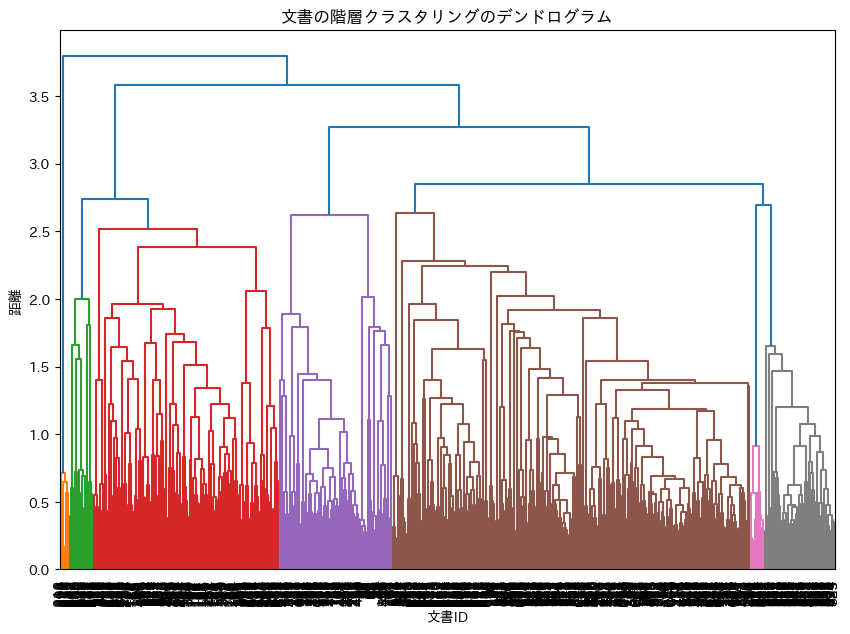

In [17]:
# 階層クラスタリング
Z = linkage(df_document_topic.iloc[:, :-2], method='ward')

# デンドログラムの可視化
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df_document_topic.index, leaf_rotation=90, leaf_font_size=10)
plt.title('文書の階層クラスタリングのデンドログラム')
plt.xlabel('文書ID')
plt.ylabel('距離')
plt.show()

In [18]:
# クラスタの分割とラベルの追加
# 指定の閾値に基づいてクラスタを作成
threshold = 2.55  # ユーザーが指定する閾値
clusters = fcluster(Z, t=threshold, criterion='distance')

# 文書-トピック行列にクラスタラベルを追加
df_document_topic['クラスタラベル'] = clusters

print("クラスタリング結果:")
display(df_document_topic)

クラスタリング結果:


,トピック1,トピック2,トピック3,トピック4,トピック5,トピック6,トピック7,トピック8,トピック9,トピック10,...,トピック94,トピック95,トピック96,トピック97,トピック98,トピック99,トピック100,文書ID,ラベル,クラスタラベル
0,0.127044,-0.001881,-0.047365,-0.009405,0.015120,0.028260,-0.017309,-0.017642,-0.007416,-0.013609,...,0.016472,-0.008154,-0.022260,0.053619,-0.000741,-0.012966,0.048286,livedoor-homme-5929933.txt,livedoor-homme,7
1,0.267305,-0.043099,0.020240,-0.044980,0.009123,0.106779,0.164770,-0.042799,-0.012136,0.028329,...,-0.052456,0.006435,0.045555,0.023785,0.027845,-0.033496,-0.030869,livedoor-homme-5822926.txt,livedoor-homme,5
2,0.279778,-0.054377,0.048534,-0.066306,0.071256,0.112159,0.134553,-0.051507,0.013903,-0.034172,...,-0.025076,0.057100,0.016525,-0.103475,-0.005188,0.057916,0.020746,livedoor-homme-5608633.txt,livedoor-homme,5
3,0.395302,-0.111388,0.159045,-0.047513,-0.064694,0.132510,0.239730,-0.107757,-0.027576,0.065684,...,-0.018072,-0.002234,-0.052973,0.010828,-0.018183,0.033155,-0.047771,livedoor-homme-5579535.txt,livedoor-homme,5
4,0.179106,-0.020880,-0.069844,0.005094,0.057879,0.008254,0.078176,0.023014,-0.033873,-0.041754,...,0.078287,0.001933,0.008688,0.065840,0.021362,-0.065534,0.040582,livedoor-homme-5230985.txt,livedoor-homme,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.171558,-0.045179,-0.085300,0.036534,0.047763,-0.024590,0.035340,-0.013712,-0.022959,-0.035178,...,0.056900,-0.043891,0.047403,0.036169,-0.005746,-0.113052,-0.051512,movie-enter-6024592.txt,movie-enter,7
896,0.172886,-0.054584,-0.064828,0.124107,-0.076791,-0.016360,-0.022094,-0.041863,-0.042347,0.042721,...,0.010243,0.066354,-0.063777,0.021771,-0.029309,-0.010999,-0.027387,movie-enter-6000744.txt,movie-enter,9
897,0.147670,-0.025525,-0.169591,0.155953,-0.027532,-0.017306,-0.001538,-0.058045,-0.024442,0.016310,...,-0.030242,-0.015317,-0.000935,0.026337,0.009420,0.017684,-0.019164,movie-enter-6249301.txt,movie-enter,9
898,0.428801,-0.123372,-0.080430,0.222772,-0.171724,-0.023062,-0.034854,-0.064215,-0.085655,0.057900,...,0.031997,0.054788,-0.051761,0.024261,-0.015943,0.023620,0.027680,movie-enter-6476740.txt,movie-enter,9


In [19]:
# 各ラベルに属する各クラスタラベルの個数を集計
cluster_label_counts = df_document_topic.groupby(['ラベル', 'クラスタラベル']).size().unstack(fill_value=0)

# 結果を表示
print("各ラベルに属する各クラスタラベルの個数:")
display(cluster_label_counts)

各ラベルに属する各クラスタラベルの個数:


クラスタラベル,1,2,3,4,5,6,7,8,9
ラベル,,,,,,,,,
dokujo-tsushin,0,0,1,61,2,0,32,0,4
it-life-hack,0,3,67,0,0,8,22,0,0
kaden-channel,0,1,74,1,1,0,23,0,0
livedoor-homme,0,0,8,7,34,0,50,0,1
movie-enter,0,0,0,1,1,0,26,2,70
peachy,0,0,3,21,1,0,56,15,4
smax,12,23,58,1,0,0,5,0,1
sports-watch,0,0,0,1,0,0,99,0,0
topic-news,0,0,5,0,0,0,94,0,1
